In [2]:
from urllib import request
import matplotlib.pyplot as plt
import numpy as np
req = request.Request('http://www-personal.umich.edu/~mejn/cp/data/circular.txt')
response = request.urlopen(req)
the_page = response.read().decode()

#Store data from website into data array
data = np.fromstring(the_page, dtype=float, sep='\n').reshape([501,501])
#print(np.shape(data))

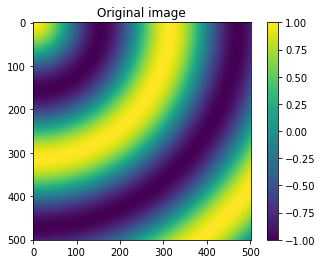

In [3]:
#Plot the original plot
plt.imshow(data)
#print(data)
plt.colorbar()
#plt.savefig("circulartxtdata.png")
plt.title("Original image")
plt.show()

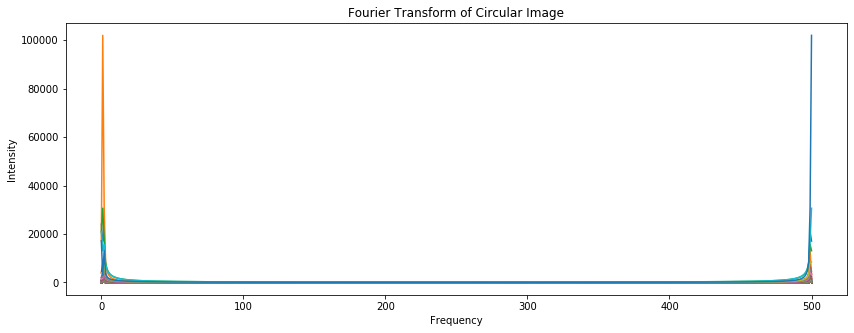

In [4]:
#Perform 2D fourier transform on data using fft2 from numpy package.
dataft1 = np.fft.fft2(data)
plt.figure(figsize=[14, 5])
plt.plot(np.abs(dataft1))
plt.xlabel("Frequency")
plt.ylabel("Intensity")
plt.title("Fourier Transform of Circular Image")
plt.show()

The above plot shows the frequency space of the data produce by doing the Fourier transform. We see many peaks around the values of 0 and 500.
Below I zoom in to the region around 0 in frequency space to get an idea of these intensities.
Zooming in, we can see that many of the intensities are greater than 10,000.

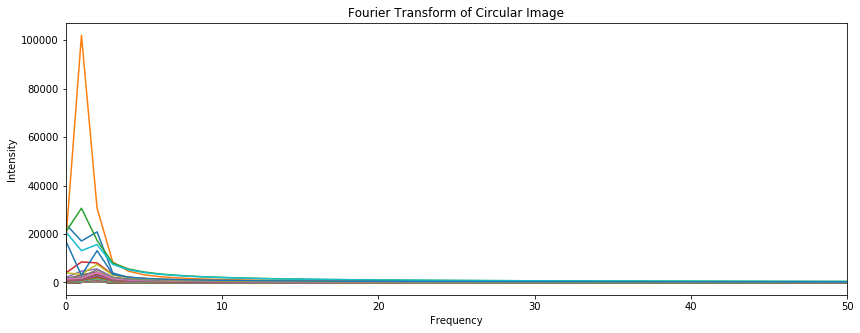

In [5]:
#Zoom in on frequency space.
plt.figure(figsize=[14, 5])
plt.plot(np.abs(dataft1))
plt.xlabel("Frequency")
plt.ylabel("Intensity")
plt.xlim(0, 50)
plt.title("Fourier Transform of Circular Image")
plt.show()

Below, I plot the inverse fourier transform of the data, and recover what appears to be the same image as the original.

So how does one compress this data? In class, we mentioned the JPEG algorithm, which is a universal algorithm for commpressing images.
JPEG works by identifying the limits of hue and color variation in the human vision.
The algorithm then removes certain elements of the data which do not cause significant distortion to the human vision.
The result is a data set, which when one applies the inverse Fourier transform, retains adequate resolution of the image.


JPEG actually uses a discrete cosine transform (DCT) as opposed to fast Fourier transform (FFT), and employs a quantization matrix
to update the values of the original data matrix. Instead of doing this full algorithm, I will just do a FFT and remove certain intensities below an arbitrary threshold. Typical JPEG images do a 10:1 compression with no significant resolution loss in the image.

So, I don't do actual compression using the JPEG method, but I try to remove some pixels from the image and seeing if there is any resolution loss.

<function matplotlib.pyplot.show(*args, **kw)>

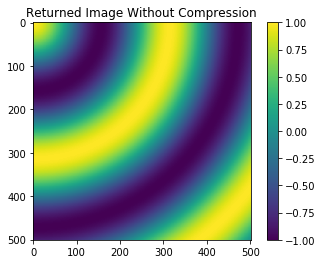

In [6]:
#Plot inverse fourier transform to recover original image.
dataift1 = np.fft.ifft2(dataft1).real
#print(dataift)
plt.imshow(dataift1)
plt.colorbar()
plt.title("Returned Image Without Compression")
#plt.savefig("circulartxtdatawocompression.png")
plt.show
#print(np.shape(dataift1))

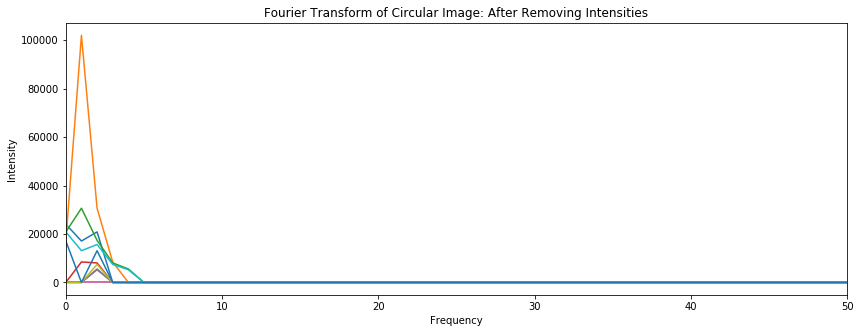

In [7]:
dataft2 = dataft1
rmint = np.abs(dataft2) < 5000 #Select intensities below 5,000
dataft2[rmint] = 0 #Set these intensities to 0.
plt.figure(figsize=[14, 5])
plt.plot(np.abs(dataft2))
plt.xlabel("Frequency")
plt.ylabel("Intensity")
plt.xlim(0, 50)
plt.title("Fourier Transform of Circular Image: After Removing Intensities")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

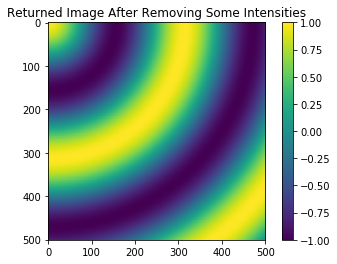

In [8]:
dataift2 = np.fft.ifft2(dataft2)
#print(dataift)
plt.imshow(dataift1)
plt.colorbar()
plt.title("Returned Image After Removing Some Intensities")
#plt.savefig("circulartxtdatawcompression.png")
plt.show
#print(np.shape(dataift1))

From above plot, we see that the image after (setting FT intensities < 5,000 equal to zero) the original image is pretty much identical to this one.
JPEG algorithm is different than this approach, but this approach is a good approximation to visualizing how it works.